In [1]:
%pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


# Task1:
## 1. Gini Impurity vs Entropy

Gini Impurity and Entropy are metrics used to measure the impurity (or uncertainty) of a node in a Decision Tree.

Gini Impurity measures the probability of incorrectly classifying a randomly chosen sample if labels were assigned randomly according to the node’s class distribution.

Entropy measures the amount of information or uncertainty present in the node using concepts from information theory.

Key differences:

Gini is computationally faster and is the default in many libraries (e.g., scikit-learn).

Entropy uses logarithmic calculations and is slightly more computationally expensive.

In practice, both usually produce very similar splits.

## 2. Overfitting in Decision Trees

Decision Trees tend to overfit when they grow very deep.

A deep tree can memorize training data, including noise.

This results in high training accuracy but poor test performance.

Overfitting happens because trees keep splitting until nodes become very pure, even if the split is not meaningful.

To prevent overfitting:

Limit tree depth

Require a minimum number of samples to split

Use ensemble methods like Random Forests

## 3. Role of max_depth and min_samples_split

max_depth
Controls the maximum depth of the tree.
Smaller values reduce overfitting but increase bias.

min_samples_split
Specifies the minimum number of samples required to split an internal node.
Higher values prevent the model from learning overly specific patterns.

Both parameters help control the bias–variance tradeoff.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score , precision_score , recall_score, classification_report

In [3]:
df = pd.read_csv("adult.csv")

In [4]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [5]:
# Replace ? -> nan so that it can be read easily
df = df.replace('?' , np.nan)

In [6]:
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [7]:
# Replace missing values with the most frequent values of that column
cols_to_fix = ['workclass' , 'occupation', 'native.country']
for col in cols_to_fix:
    df[col] = df[col].fillna(df[col].mode()[0])

In [8]:
y = df['income']
X = df.drop('income',axis= 1)

In [9]:
#Stores all categorical columns
X.select_dtypes(include=['object', 'category']).columns.tolist()

# One-hot encoding of all categorical cols
X =pd.get_dummies(X , drop_first=True)

In [10]:
# Train test split
X_train , X_test , y_train , y_test = train_test_split(X, y , test_size = 0.2 , random_state = 42)

In [11]:
# Training the model 
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

In [12]:
acc_dt = accuracy_score(y_test , y_pred)
print("Decision Tree Classifier Accuracy :", acc_dt)
print(classification_report(y_test , y_pred ))

Decision Tree Classifier Accuracy : 0.8143712574850299
              precision    recall  f1-score   support

       <=50K       0.88      0.88      0.88      4976
        >50K       0.61      0.61      0.61      1537

    accuracy                           0.81      6513
   macro avg       0.74      0.74      0.74      6513
weighted avg       0.81      0.81      0.81      6513



## 1. Bagging

Bagging (Bootstrap Aggregating) is an ensemble technique where:

Multiple models are trained on different random subsets of the training data (with replacement).

Predictions from all models are combined using averaging (regression) or voting (classification).

Bagging reduces variance and improves model stability.

## 2. Why Random Forests Reduce Overfitting

Random Forests reduce overfitting by:

Training many Decision Trees on different bootstrap samples

Selecting a random subset of features at each split

Averaging predictions across trees

This randomness decorrelates trees, preventing them from making the same mistakes.

## 3. Feature Importance

Feature importance in Random Forests is calculated using:

The total reduction in impurity contributed by a feature across all trees

Features that frequently create better splits receive higher importance scores.

In [13]:
from sklearn.ensemble import RandomForestClassifier

In [14]:
rf = RandomForestClassifier(n_estimators=100 , max_depth= 10, random_state =42)
rf.fit(X_train , y_train)
y_pred_rf = rf.predict(X_test)

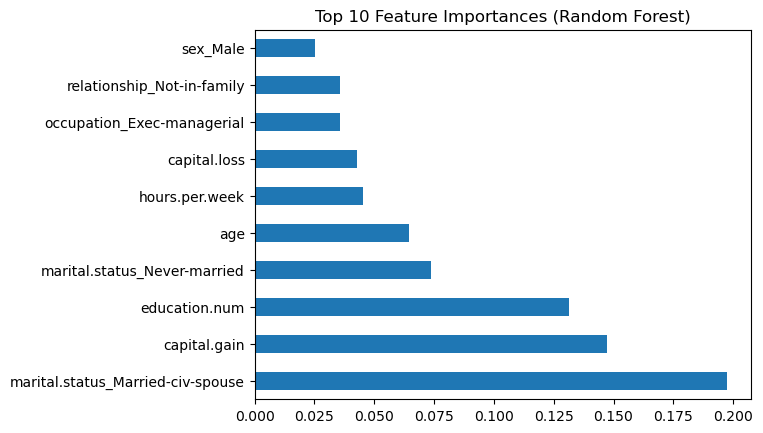

In [15]:
# Plot Feature Importance
feat_importances = pd.Series(rf.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title("Top 10 Feature Importances (Random Forest)")
plt.show()

In [16]:
acc_rf = accuracy_score(y_test , y_pred_rf)
print("Accuracy of Random Forest: ", acc_rf)

Accuracy of Random Forest:  0.8547520343927529


In [17]:
comparison_1 = pd.DataFrame({
    'Model' : ['DecisionTree', 'RandomForest'],
    'Accuracy': [acc_dt , acc_rf]
})
print(comparison_1)

          Model  Accuracy
0  DecisionTree  0.814371
1  RandomForest  0.854752


# Task 3 

## 1. Boosting vs Bagging
Bagging trains many models independently on random samples of data and then averages their results. It mainly reduces variance (used in Random Forest).
Boosting, on the other hand, trains models one after another. Each new model focuses on fixing the mistakes of the previous models. Boosting mainly reduces bias and improves accuracy.

## 2. Sequential Learning 
In Gradient Boosting, models are trained sequentially.
The first model makes predictions and errors are calculated.
The next model is trained to correct those errors, not to relearn everything.
This process continues, and the final prediction is the sum of all models, each improving the previous one step by step.

## 3. Learning Rate =
The learning rate controls how much each new model contributes to the final prediction.
Small learning rate → slow learning, less overfitting, better generalization
Large learning rate → fast learning, higher risk of overfitting
Usually, a small learning rate with more trees gives the best results.

In [18]:
from lightgbm import LGBMClassifier

#  Initializing  LightGBM
lgbm_model = LGBMClassifier(
    n_estimators=100,
    learning_rate=0.1,
    num_leaves=31, 
    random_state=42
)

# Train the model

lgbm_model.fit(X_train, y_train)

# Predict and Evaluate
y_pred_lgbm = lgbm_model.predict(X_test)
acc_lgbm = accuracy_score(y_test, y_pred_lgbm)
print("--- LightGBM Performance ---")
print(f"Accuracy:", acc_lgbm)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lgbm))

[LightGBM] [Info] Number of positive: 6304, number of negative: 19744
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003524 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 740
[LightGBM] [Info] Number of data points in the train set: 26048, number of used features: 81
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.242015 -> initscore=-1.141665
[LightGBM] [Info] Start training from score -1.141665
--- LightGBM Performance ---
Accuracy: 0.872255489021956

Classification Report:
              precision    recall  f1-score   support

       <=50K       0.89      0.95      0.92      4976
        >50K       0.78      0.63      0.70      1537

    accuracy                           0.87      6513
   macro avg       0.84      0.79      0.81      6513
weighted avg       0.87      0.87      0.87      6513



In [19]:
comparison_2 = pd.DataFrame({
    "Model" : ['RandomForestClassifier','LightGBM'],
    "Accuracy" : [acc_rf , acc_lgbm]
})
print(comparison_2)

                    Model  Accuracy
0  RandomForestClassifier  0.854752
1                LightGBM  0.872255


In [20]:
# Task 4
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

rf1 = RandomForestClassifier(random_state=42)

param_dist = {
    "n_estimators": [100, 200, 300],
    "max_depth": [None, 5, 10, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

rf_random = RandomizedSearchCV(
    estimator=rf1,
    param_distributions=param_dist,
    n_iter=10,
    cv=3,
    scoring="accuracy",
    n_jobs=-1,
    random_state=42
)

rf_random.fit(X_train, y_train)

print("Best Parameters:", rf_random.best_params_)
print("Best CV Score:", rf_random.best_score_)


Best Parameters: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': None}
Best CV Score: 0.8628685971291024


In [21]:
# Evaluate Tuned Random Forest

best_rf = rf_random.best_estimator_

y_pred_tuned_rf = best_rf.predict(X_test)
acc_tuned_rf = accuracy_score(y_test, y_pred_tuned_rf)
print("Accuracy:", acc_tuned_rf)
print("Classification Report:", classification_report(y_test , y_pred_tuned_rf) )


Accuracy: 0.8638108398587441
Classification Report:               precision    recall  f1-score   support

       <=50K       0.88      0.95      0.91      4976
        >50K       0.77      0.60      0.68      1537

    accuracy                           0.86      6513
   macro avg       0.83      0.77      0.79      6513
weighted avg       0.86      0.86      0.86      6513



In [22]:
#  Random Forest Feature Importance
import pandas as pd
import matplotlib.pyplot as plt

importances = best_rf.feature_importances_

feature_importance_df = pd.DataFrame({
    "Feature": X_train.columns,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

feature_importance_df.head(10)


,Feature,Importance
29,marital.status_Married-civ-spouse,0.146355
3,capital.gain,0.134749
0,age,0.105128
2,education.num,0.102550
5,hours.per.week,0.063083
1,fnlwgt,0.060862
31,marital.status_Never-married,0.049122
4,capital.loss,0.037803
36,occupation_Exec-managerial,0.027941
47,relationship_Not-in-family,0.025289


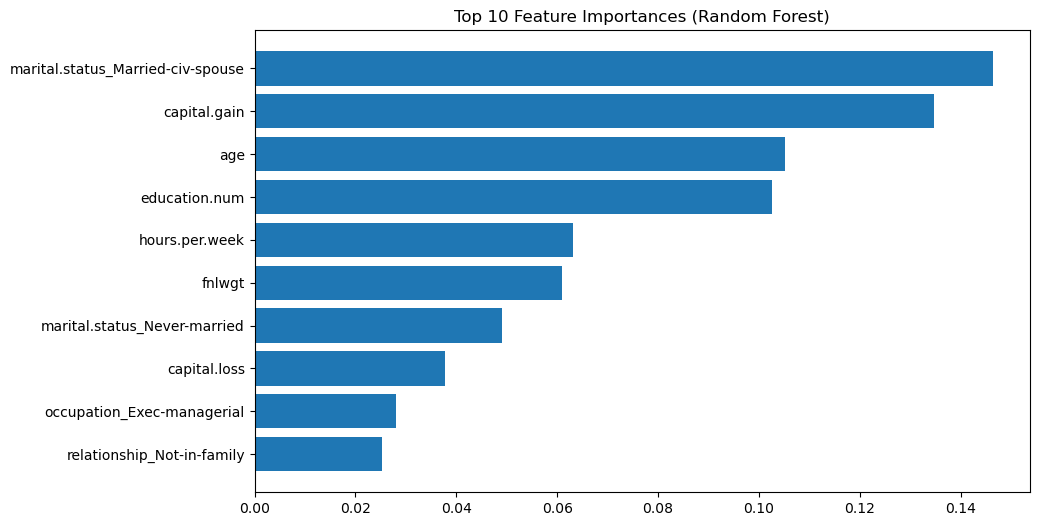

In [23]:
plt.figure(figsize=(10, 6))
plt.barh(
    feature_importance_df["Feature"].head(10),
    feature_importance_df["Importance"].head(10)
)
plt.gca().invert_yaxis()
plt.title("Top 10 Feature Importances (Random Forest)")
plt.show()


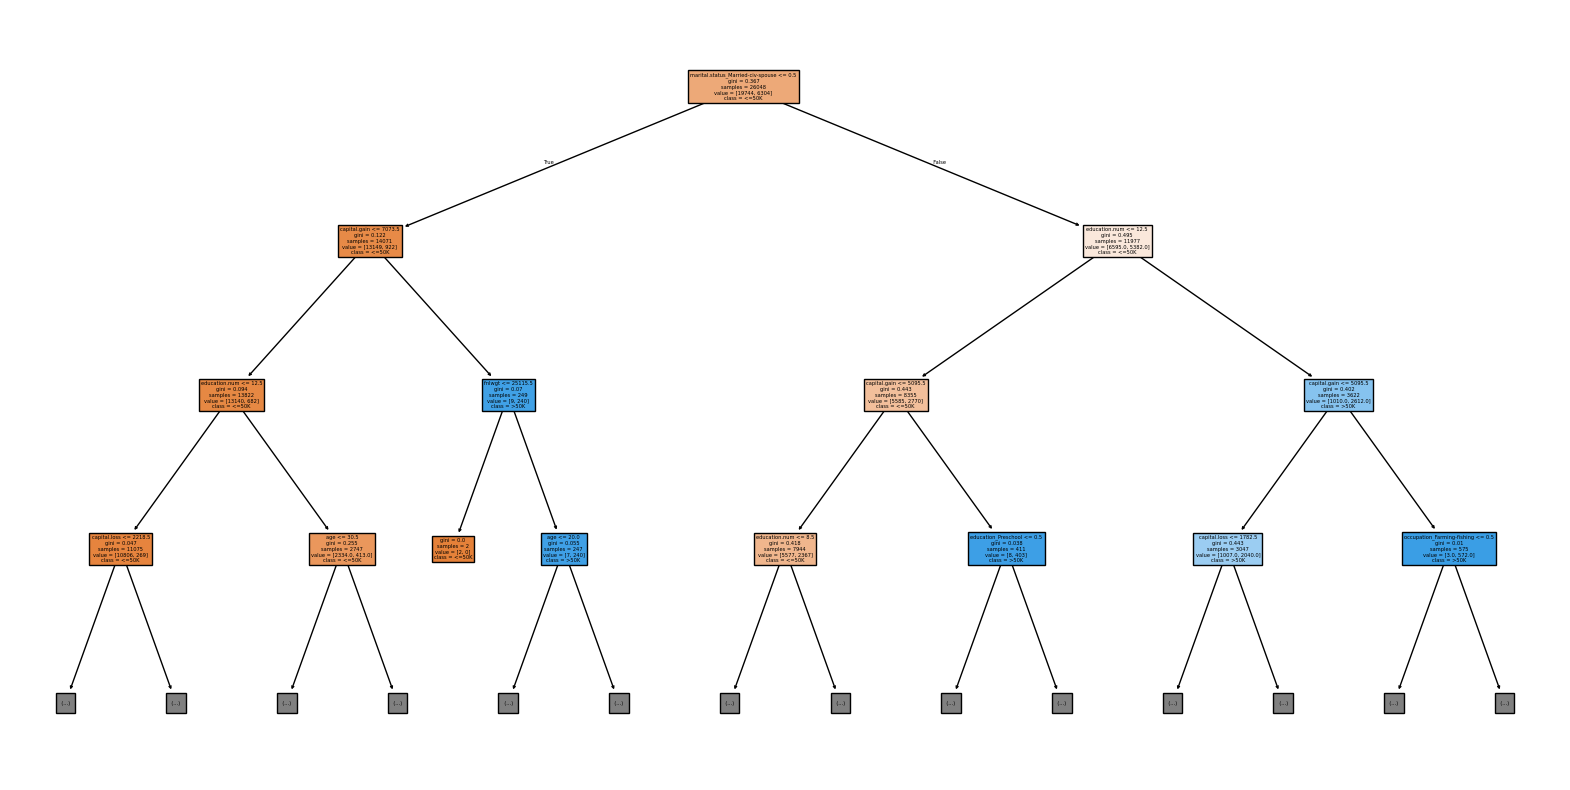

In [24]:
# Tree Visualisation
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plot_tree(
    dt,             
    feature_names=X_train.columns,
    class_names=["<=50K", ">50K"],
    filled=True,
    max_depth=3
)
plt.show()


In [25]:
comparison_df = pd.DataFrame({
    "Model": ["Decision Tree", "Random Forest", "Tuned Random Forest"],
    "Accuracy": [
        acc_dt , acc_rf , acc_tuned_rf
    ]
})

comparison_df


,Model,Accuracy
0,Decision Tree,0.814371
1,Random Forest,0.854752
2,Tuned Random Forest,0.863811


In [26]:
%pip install shap

Note: you may need to restart the kernel to use updated packages.


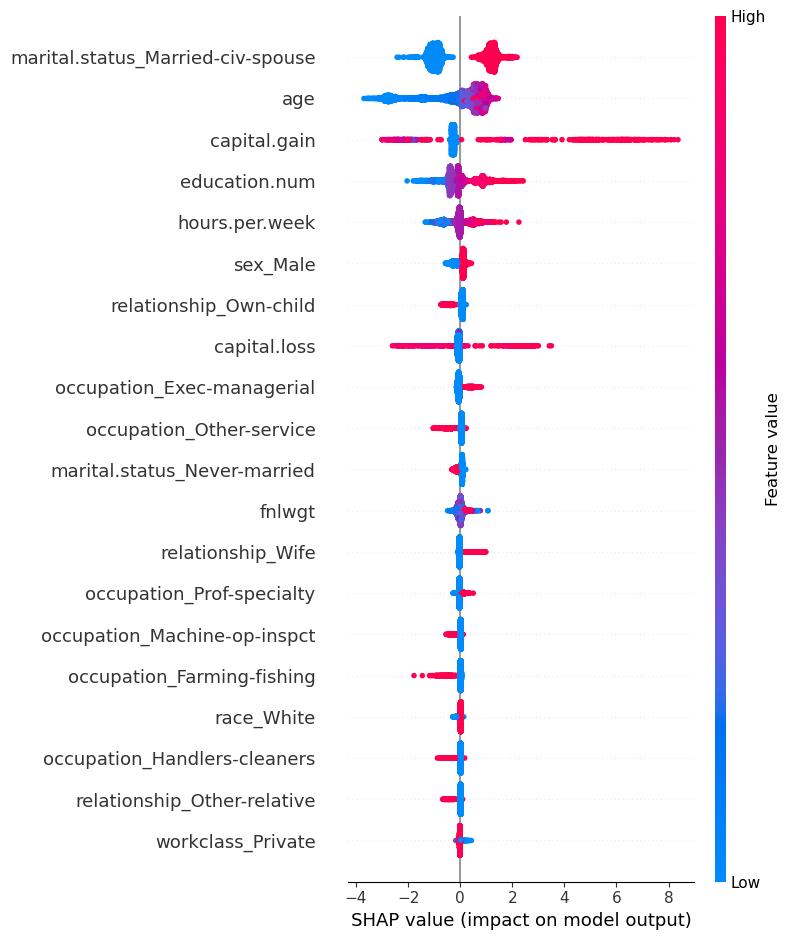

In [27]:
import shap
explainer = shap.TreeExplainer(lgbm_model)
shap_values = explainer(X_test)
shap.summary_plot(shap_values, X_test)

